# What is the average depth and magnitude of earthquakes by time zone?
<br>
For this analysis I used the data set "Significant Earthquakes, 1965-2016" link: https://www.kaggle.com/usgs/earthquake-database <br> <br>
The main objective of this project is to demonstrate how to work with dates, time and time zones. This is why, for the purpose of this work, the date will be considered as if it corresponded to the local date where the earthquake occurred.

### Package used

In [1]:
import pandas as pd
from timezonefinder import TimezoneFinder #Allows to find the time zone based on a given Latitude and Longitude
import pytz
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from textwrap import wrap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D

In [2]:
#Import data
df = pd.read_csv('database.csv')

In [3]:
#Check first records
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,MW,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,MW,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,MW,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic



### 1. Data Preparation
<br>
As we observed in the previous observations, the data set does not have the time zone identified, but it does have Latitude and Longitude. In order to set the time zone, I am making use of the TimeZoneFInder module.

In [4]:
my_func = TimezoneFinder().timezone_at  #Note the no parenthesis on the function call!
df['timezone'] = df.apply(lambda x: my_func(lng=x['Longitude'], lat=x['Latitude']),axis=1)
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status,timezone
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,Etc/GMT-10
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,Asia/Jayapura
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,MW,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,Etc/GMT+12
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,MW,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,Etc/GMT+2
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,MW,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,Etc/GMT-8


<br> Now I'm going to join the date and time in a single variable called date_and_time.

In [5]:
date_and_time = df['Date'] + " " + df['Time']
date_and_time

0        01/02/1965 13:44:18
1        01/04/1965 11:29:49
2        01/05/1965 18:05:58
3        01/08/1965 18:49:43
4        01/09/1965 13:32:50
                ...         
23407     12/28/2016 8:22:12
23408     12/28/2016 9:13:47
23409    12/28/2016 12:38:51
23410    12/29/2016 22:30:19
23411    12/30/2016 20:08:28
Length: 23412, dtype: object

<br>
Convert in data time the variable date_and_time

In [6]:
df['Moment_earthquake'] = pd.to_datetime(date_and_time)
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status,timezone,Moment_earthquake
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,Etc/GMT-10,1965-01-02 13:44:18
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,Asia/Jayapura,1965-01-04 11:29:49
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,MW,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,Etc/GMT+12,1965-01-05 18:05:58
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,MW,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,Etc/GMT+2,1965-01-08 18:49:43
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,MW,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,Etc/GMT-8,1965-01-09 13:32:50


<br>
Drop date and time column

In [7]:
df = df.drop(['Date', 'Time'], axis = 1)
df.head()

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status,timezone,Moment_earthquake
0,19.246,145.616,Earthquake,131.6,6.0,MW,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,Etc/GMT-10,1965-01-02 13:44:18
1,1.863,127.352,Earthquake,80.0,5.8,MW,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,Asia/Jayapura,1965-01-04 11:29:49
2,-20.579,-173.972,Earthquake,20.0,6.2,MW,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,Etc/GMT+12,1965-01-05 18:05:58
3,-59.076,-23.557,Earthquake,15.0,5.8,MW,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,Etc/GMT+2,1965-01-08 18:49:43
4,11.938,126.427,Earthquake,15.0,5.8,MW,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,Etc/GMT-8,1965-01-09 13:32:50


In [8]:
#See the 10 first timezones in pytz
pytz.all_timezones[:10]

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara',
 'Africa/Asmera',
 'Africa/Bamako',
 'Africa/Bangui',
 'Africa/Banjul',
 'Africa/Bissau']

In [9]:
#See unique time zone in the df 
df['timezone'].unique()

array(['Etc/GMT-10', 'Asia/Jayapura', 'Etc/GMT+12', 'Etc/GMT+2',
       'Etc/GMT-8', 'Pacific/Efate', 'Asia/Kathmandu', 'Etc/GMT-11',
       'Etc/GMT-12', 'Asia/Jakarta', 'Asia/Kamchatka', 'Asia/Dushanbe',
       'Etc/GMT-9', 'America/Adak', 'Etc/GMT+3', 'Etc/GMT+11',
       'Asia/Makassar', 'Asia/Tokyo', 'Asia/Kolkata', 'America/Santiago',
       'Pacific/Port_Moresby', 'America/Bogota', 'Etc/GMT+7',
       'America/Mexico_City', 'Europe/Istanbul',
       'America/Argentina/Cordoba', 'Etc/GMT+9', 'Asia/Manila',
       'Europe/Athens', 'Asia/Kabul', 'Asia/Taipei', 'Etc/GMT-2',
       'Pacific/Fiji', 'America/Anchorage', 'Etc/GMT+8', 'America/Nome',
       'Etc/GMT+6', 'America/Los_Angeles', 'America/El_Salvador',
       'America/Argentina/Salta', 'Asia/Shanghai', 'Pacific/Guadalcanal',
       'Etc/GMT-3', 'Pacific/Auckland', 'Asia/Tehran', 'Etc/GMT+10',
       'Etc/GMT', 'Pacific/Bougainville', 'America/Argentina/La_Rioja',
       'America/Lima', 'Etc/GMT+1', 'America/La_Paz', 'Etc/GMT

<br>
The following for loop allows us to verify that the values stored in the time zone in the df are included within all possible time zones.

In [10]:
for i in df['timezone'].unique():
    if i in (pytz.all_timezones):
        print(True)
    else:
        print(False)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


### 2. Data Manipulation
<br>
Once the data is ready, I start the data manipulation process. The first thing is to validate the Moment_earthquake column

In [11]:
df['Moment_earthquake'].iloc[0] #Timestamp is the pandas' equivalent of the Python datetime object

Timestamp('1965-01-02 13:44:18')

In [12]:
#Identify the timezone for the first record
df['Moment_earthquake'].iloc[0].tz_localize(df['timezone'].iloc[0])

Timestamp('1965-01-02 13:44:18+1000', tz='Etc/GMT-10')

As can be seen in the previous result, after the hour the number +1000 appears and the zone tx=Etc/GMT. This means that the time reported in this first record is 10 hours away from the universal time UTC.

In [13]:
# Create time zone aware objects for all records. Obtain the relevant offset values and time zones for each record
list_momentearthquake = []
list_momentearthquake

[]

In [14]:
#Create a foor loop to repeat the process for each Moment_earquake in the dataset
for i in range(len(df)):
    list_momentearthquake.append(pd.to_datetime(df['Moment_earthquake'].iloc[i].tz_localize(df['timezone'].iloc[i], ambiguous='raise', nonexistent='raise')))

# The raise value allows us to obtain a message indicating an exception if a certain condition has not been met

In [15]:
#Check the first 10 records
list_momentearthquake[:10]

[Timestamp('1965-01-02 13:44:18+1000', tz='Etc/GMT-10'),
 Timestamp('1965-01-04 11:29:49+0900', tz='Asia/Jayapura'),
 Timestamp('1965-01-05 18:05:58-1200', tz='Etc/GMT+12'),
 Timestamp('1965-01-08 18:49:43-0200', tz='Etc/GMT+2'),
 Timestamp('1965-01-09 13:32:50+0800', tz='Etc/GMT-8'),
 Timestamp('1965-01-10 13:36:32+1100', tz='Pacific/Efate'),
 Timestamp('1965-01-12 13:32:25+0530', tz='Asia/Kathmandu'),
 Timestamp('1965-01-15 23:17:42+1100', tz='Etc/GMT-11'),
 Timestamp('1965-01-16 11:32:37-0200', tz='Etc/GMT+2'),
 Timestamp('1965-01-17 10:43:17+1200', tz='Etc/GMT-12')]

In [16]:
#Using the strftime and the parameter %z it is possible to see the value of the time zone
list_momentearthquake[0].strftime('%z')

'+1000'

In [17]:
#Then dividing by 100 we can obtain the value in hours
float(list_momentearthquake[0].strftime('%z')) / 100

10.0

In [18]:
#This is another way to get the above output
list_momentearthquake[0].utcoffset().total_seconds() / 3600

10.0

In [19]:
#Create a new coulm getting the hour Off set UTC
df['OffsetUTC'] = [list_momentearthquake[i].utcoffset().total_seconds() / 3600 for i in range(len(df))]
df

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status,timezone,Moment_earthquake,OffsetUTC
0,19.2460,145.6160,Earthquake,131.60,6.0,MW,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,Etc/GMT-10,1965-01-02 13:44:18,10.0
1,1.8630,127.3520,Earthquake,80.00,5.8,MW,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,Asia/Jayapura,1965-01-04 11:29:49,9.0
2,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,Etc/GMT+12,1965-01-05 18:05:58,-12.0
3,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,Etc/GMT+2,1965-01-08 18:49:43,-2.0
4,11.9380,126.4270,Earthquake,15.00,5.8,MW,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,Etc/GMT-8,1965-01-09 13:32:50,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,38.3917,-118.8941,Earthquake,12.30,5.6,ML,NN00570710,NN,NN,NN,Reviewed,America/Los_Angeles,2016-12-28 08:22:12,-8.0
23408,38.3777,-118.8957,Earthquake,8.80,5.5,ML,NN00570744,NN,NN,NN,Reviewed,America/Los_Angeles,2016-12-28 09:13:47,-8.0
23409,36.9179,140.4262,Earthquake,10.00,5.9,MWW,US10007NAF,US,US,US,Reviewed,Asia/Tokyo,2016-12-28 12:38:51,9.0
23410,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,US10007NL0,US,US,US,Reviewed,Asia/Makassar,2016-12-29 22:30:19,8.0


In [20]:
#Order and select the columns needed for the analysis
columns_names_reordered = ['Moment_earthquake', 'timezone', 'OffsetUTC', 'Type', 'Depth', 'Magnitude', 'Source', 'Status']
df = df[columns_names_reordered]
df.head()

,Moment_earthquake,timezone,OffsetUTC,Type,Depth,Magnitude,Source,Status
0,1965-01-02 13:44:18,Etc/GMT-10,10.0,Earthquake,131.6,6.0,ISCGEM,Automatic
1,1965-01-04 11:29:49,Asia/Jayapura,9.0,Earthquake,80.0,5.8,ISCGEM,Automatic
2,1965-01-05 18:05:58,Etc/GMT+12,-12.0,Earthquake,20.0,6.2,ISCGEM,Automatic
3,1965-01-08 18:49:43,Etc/GMT+2,-2.0,Earthquake,15.0,5.8,ISCGEM,Automatic
4,1965-01-09 13:32:50,Etc/GMT-8,8.0,Earthquake,15.0,5.8,ISCGEM,Automatic


In [21]:
#Group by timezone and offsetUTC
df.groupby(['timezone', 'OffsetUTC']).count()

Moment_earthquake  Type  Depth  Magnitude  \
timezone           OffsetUTC                                              
Africa/Addis_Ababa  3.0                      18    18     18         18   
Africa/Algiers      0.0                       2     2      2          2   
                    1.0                      16    16     16         16   
Africa/Asmara       3.0                       4     4      4          4   
Africa/Blantyre     2.0                       6     6      6          6   
...                                         ...   ...    ...        ...   
Pacific/Saipan      11.0                      1     1      1          1   
Pacific/Tahiti     -10.0                     30    30     30         30   
Pacific/Tongatapu   13.0                     51    51     51         51   
                    14.0                      2     2      2          2   
Pacific/Wallis      12.0                      6     6      6          6   

                              Source  Status  
timezone           OffsetUTC                  
Africa/Addis_Ababa  3.0           18      18  
Africa/Algiers      0.0            2       2  
                    1.0           16      16  
Africa/Asmara       3.0            4       4  
Africa/Blantyre     2.0            6       6  
...                              ...     ...  
Pacific/Saipan      11.0           1       1  
Pacific/Tahiti     -10.0          30      30  
Pacific/Tongatapu   13.0          51      51  
                    14.0           2       2  
Pacific/Wallis      12.0           6       6  

[298 rows x 6 columns]

According to the previous result, it can be seen that there are time zones with different OffsetUTC. This is possible, considering that depending on the season of the year, the local time can change.

In [22]:
#If we filter only by Africa/Algiers, we can see that there are two records with the same time as UTC 
#and 16 records with an hour ahead of UTC
df[df['timezone']=='Africa/Algiers'].sort_values('OffsetUTC')

,Moment_earthquake,timezone,OffsetUTC,Type,Depth,Magnitude,Source,Status
5715,1980-12-07 17:37:10,Africa/Algiers,0.0,Earthquake,10.0,5.7,US,Reviewed
5787,1981-02-01 13:19:59,Africa/Algiers,0.0,Earthquake,10.0,5.7,US,Reviewed
5659,1980-10-10 12:25:24,Africa/Algiers,1.0,Earthquake,10.0,7.3,US,Reviewed
16283,2003-05-27 17:11:29,Africa/Algiers,1.0,Earthquake,8.0,5.8,US,Reviewed
16269,2003-05-21 18:51:10,Africa/Algiers,1.0,Earthquake,10.0,5.7,US,Reviewed
16268,2003-05-21 18:44:20,Africa/Algiers,1.0,Earthquake,12.0,6.8,US,Reviewed
15104,2000-11-10 20:10:53,Africa/Algiers,1.0,Earthquake,10.0,5.7,US,Reviewed
14651,1999-12-22 17:36:56,Africa/Algiers,1.0,Earthquake,10.0,5.6,US,Reviewed
13179,1996-09-04 04:14:03,Africa/Algiers,1.0,Earthquake,10.0,5.5,US,Reviewed
9686,1989-10-29 19:21:52,Africa/Algiers,1.0,Earthquake,10.0,5.6,US,Reviewed


### 3. Data Analysis

In order to have the information in the same time zone for data organization purposes, I have created a new column converting local times into UTC universal time.

In [23]:
df['Moment_earthquake-UTC'] = [pd.to_datetime(df['Moment_earthquake'].iloc[i]).tz_localize(df['timezone'].iloc[i]).tz_convert('UTC') 
                        for i in range(len(df))]
df.head()

<ipython-input-23-c25c4ef8df78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Moment_earthquake-UTC'] = [pd.to_datetime(df['Moment_earthquake'].iloc[i]).tz_localize(df['timezone'].iloc[i]).tz_convert('UTC')


,Moment_earthquake,timezone,OffsetUTC,Type,Depth,Magnitude,Source,Status,Moment_earthquake-UTC
0,1965-01-02 13:44:18,Etc/GMT-10,10.0,Earthquake,131.6,6.0,ISCGEM,Automatic,1965-01-02 03:44:18+00:00
1,1965-01-04 11:29:49,Asia/Jayapura,9.0,Earthquake,80.0,5.8,ISCGEM,Automatic,1965-01-04 02:29:49+00:00
2,1965-01-05 18:05:58,Etc/GMT+12,-12.0,Earthquake,20.0,6.2,ISCGEM,Automatic,1965-01-06 06:05:58+00:00
3,1965-01-08 18:49:43,Etc/GMT+2,-2.0,Earthquake,15.0,5.8,ISCGEM,Automatic,1965-01-08 20:49:43+00:00
4,1965-01-09 13:32:50,Etc/GMT-8,8.0,Earthquake,15.0,5.8,ISCGEM,Automatic,1965-01-09 05:32:50+00:00


In [24]:
#Order columns
columns_names_reordered = ['Moment_earthquake-UTC','Moment_earthquake', 'timezone', 'OffsetUTC', 'Type', 'Depth', 'Magnitude', 'Source', 'Status']
df = df[columns_names_reordered]
df.head()

,Moment_earthquake-UTC,Moment_earthquake,timezone,OffsetUTC,Type,Depth,Magnitude,Source,Status
0,1965-01-02 03:44:18+00:00,1965-01-02 13:44:18,Etc/GMT-10,10.0,Earthquake,131.6,6.0,ISCGEM,Automatic
1,1965-01-04 02:29:49+00:00,1965-01-04 11:29:49,Asia/Jayapura,9.0,Earthquake,80.0,5.8,ISCGEM,Automatic
2,1965-01-06 06:05:58+00:00,1965-01-05 18:05:58,Etc/GMT+12,-12.0,Earthquake,20.0,6.2,ISCGEM,Automatic
3,1965-01-08 20:49:43+00:00,1965-01-08 18:49:43,Etc/GMT+2,-2.0,Earthquake,15.0,5.8,ISCGEM,Automatic
4,1965-01-09 05:32:50+00:00,1965-01-09 13:32:50,Etc/GMT-8,8.0,Earthquake,15.0,5.8,ISCGEM,Automatic


In [25]:
#Calculate the average of depth and magnitude by timezone
df.groupby("timezone").mean()

,OffsetUTC,Depth,Magnitude
timezone,,,
Africa/Addis_Ababa,3.000000,12.461111,5.916667
Africa/Algiers,0.888889,9.466667,5.877778
Africa/Asmara,3.000000,15.750000,5.875000
Africa/Blantyre,2.000000,15.483333,5.850000
Africa/Cairo,2.500000,13.562500,5.812500
...,...,...,...
Pacific/Port_Moresby,10.000000,61.541789,5.922428
Pacific/Saipan,10.047619,226.189048,5.838095
Pacific/Tahiti,-10.000000,0.000000,5.676667


As seen in the table above, some OFFsetUTC are not integers. This is because in that time zone there are several hours according to the season of the year.

### 4. Data Visualization

In [30]:
a = df.groupby(['timezone']).mean().reset_index().sort_values(by='Depth', ascending=False).head(10).round(2)
a

,timezone,OffsetUTC,Depth,Magnitude
70,America/Rio_Branco,-4.84,596.24,6.22
43,America/Eirunepe,-5.00,573.42,6.28
34,America/Asuncion,-3.00,569.00,6.50
189,Pacific/Fiji,12.04,522.83,5.82
24,America/Argentina/Cordoba,-3.05,515.62,6.15
129,Asia/Vladivostok,10.38,441.74,5.93
53,America/La_Paz,-4.00,246.31,5.97
196,Pacific/Saipan,10.05,226.19,5.84
29,America/Argentina/Salta,-3.02,218.84,5.82
172,Europe/Madrid,1.67,215.27,5.83


In [31]:
ANGLES = np.linspace(0.05, 2 * np.pi - 0.05, len(a), endpoint=False)
DEPTHS = a["Depth"].values
MAGNITUDES = a['Magnitude'].values
TIMEZONES = a['timezone'].values

GREY12 = "#1f1f1f"

# Set default font to Bell MT
plt.rcParams.update({"font.family": "Bell MT"})

# Set default font color to GREY12
plt.rcParams["text.color"] = GREY12

# The minus glyph is not available in Bell MT
# This disables it, and uses a hyphen
plt.rc("axes", unicode_minus=False)

# Colors
COLORS = ["#DCCFEC","#A997DF","#4F517D","#1A3A3A"]

# Colormap
cmap = mpl.colors.LinearSegmentedColormap.from_list("my color", COLORS, N=256)

# Normalizer
norm = mpl.colors.Normalize(vmin=MAGNITUDES.min(), vmax=MAGNITUDES.max())

# Normalized colors. Each number of tracks is mapped to a color in the 
# color scale 'cmap'
COLORS = cmap(norm(MAGNITUDES))

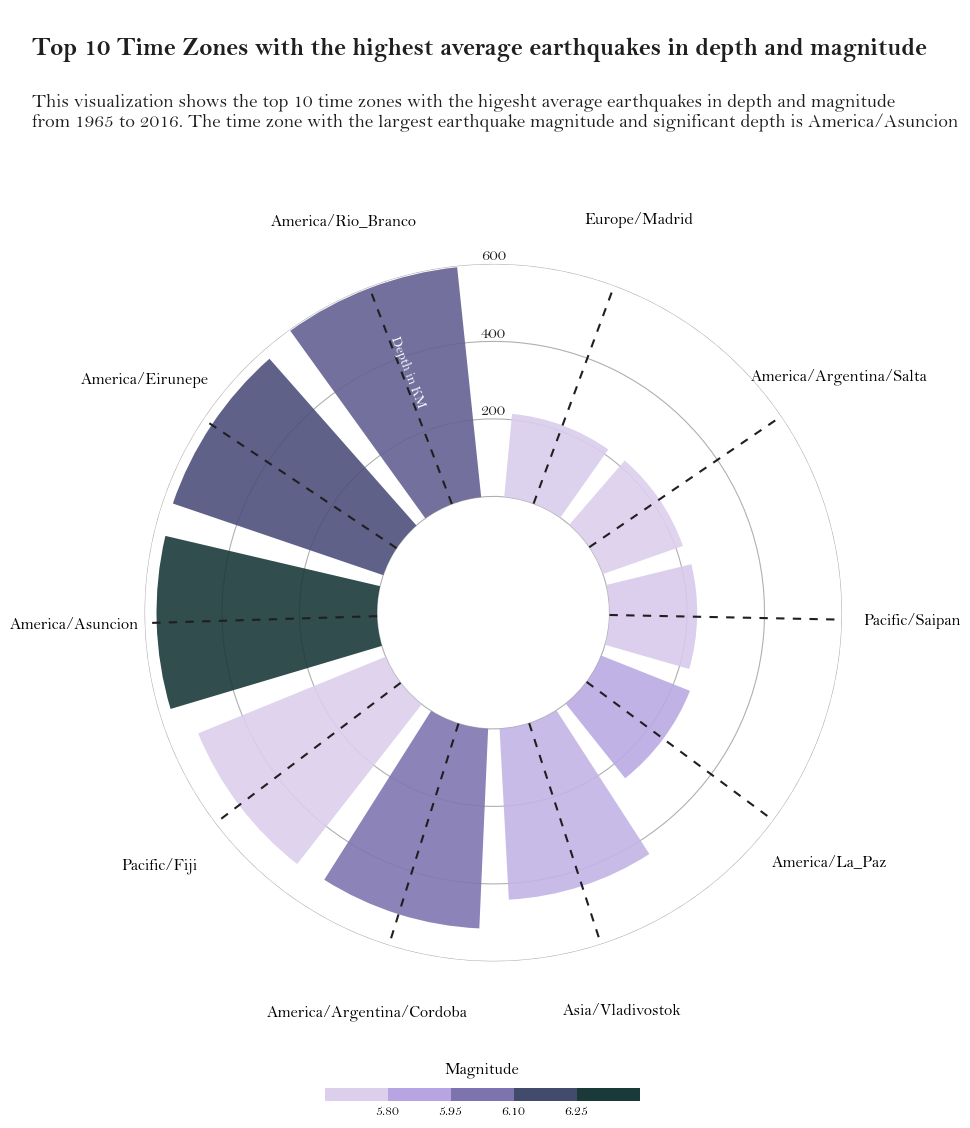

In [36]:
# Initialize layout in polar coordinates
fig, ax = plt.subplots(figsize=(9, 12.6), subplot_kw={"projection": "polar"})

# Set background color to white, both axis and figure.
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

ax.set_theta_offset(1.2 * np.pi / 2)
ax.set_ylim(-300, 600)

# Add geometries to the plot -------------------------------------


# Add bars to represent the average depth
ax.bar(ANGLES, DEPTHS, color=COLORS, alpha=0.9, width=0.52, zorder=10)

# Add dashed vertical lines. These are just references
ax.vlines(ANGLES, 0, 3000, color=GREY12, ls=(0, (4, 4)), zorder=11)


# Add labels for the time zone -------------------------------------
# Note the 'wrap()' function.

# but the 'break_long_words' means we don't want to break words 
# longer than 5 characters.
TIMEZONES = ["\n".join(wrap(r, 5, break_long_words=False)) for r in TIMEZONES]
TIMEZONES

# Set the labels
ax.set_xticks(ANGLES)
ax.set_xticklabels(TIMEZONES, size=12);

# Remove lines for polar axis (x)
ax.xaxis.grid(False)


# Put grid lines for radial axis (y) at 0, 1000, 2000, and 3000
ax.set_yticklabels([])
ax.set_yticks([0, 200, 400, 600])

# Remove spines
ax.spines["start"].set_color("none")
ax.spines["polar"].set_color("none")

# Adjust padding of the x axis labels ----------------------------
# This is going to add extra space around the labels for the 
# ticks of the x axis.
XTICKS = ax.xaxis.get_major_ticks()
for tick in XTICKS:
    tick.set_pad(40)
    
# Add custom annotations -----------------------------------------
# The following represent the heights in the values of the y axis
PAD = 10
ax.text(-0.2 * np.pi / 2, 200 + PAD, "200", ha="center", size=12)
ax.text(-0.2 * np.pi / 2, 400 + PAD, "400", ha="center", size=12)
ax.text(-0.2 * np.pi / 2, 600 + PAD, "600", ha="center", size=12)

# Add text to explain the meaning of the height of the bar and the
# height of the dot
ax.text(ANGLES[0]- 0.022, 360, "Depth in KM", rotation=-69, 
        ha="center", va="center", size=10, zorder=14, color='white')

# First, make some room for the legend and the caption in the bottom.
fig.subplots_adjust(bottom=0.175)

# Create an inset axes.
# Width and height are given by the (0.35 and 0.01) in the 
# bbox_to_anchor
cbaxes = inset_axes(
    ax, 
    width="100%", 
    height="100%", 
    loc="center",
    bbox_to_anchor=(0.325, 0.1, 0.35, 0.01),
    bbox_transform=fig.transFigure # Note it uses the figure.
) 

# Create a new norm, which is discrete
bounds = [0, 5.80, 5.95, 6.10, 6.25, 6.40]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# Create the colorbar
cb = fig.colorbar(
    ScalarMappable(norm=norm, cmap=cmap), 
    cax=cbaxes, # Use the inset_axes created above
    orientation = "horizontal",
    ticks=[5.80, 5.95, 6.10, 6.25]
)

# Remove the outline of the colorbar
cb.outline.set_visible(False)

# Remove tick marks
cb.ax.xaxis.set_tick_params(size=0)

# Set legend label and move it to the top (instead of default bottom)
cb.set_label("Magnitude", size=12, labelpad=-40)

# Make some room for the title and subtitle above.
fig.subplots_adjust(top=0.8)

# Define title, subtitle, and caption
title = "\nTop 10 Time Zones with the highest average earthquakes in depth and magnitude"
subtitle = "\n".join([
    "This visualization shows the top 10 time zones with the higesht average earthquakes in depth and magnitude",
    "from 1965 to 2016. The time zone with the largest earthquake magnitude and significant depth is America/Asuncion"
])

# And finally, add them to the plot.
fig.text(0, 0.93, title, fontsize=18, weight="bold", ha="left", va="baseline")
fig.text(0, 0.9, subtitle, fontsize=14, ha="left", va="top")

fig.savefig("plot.png", dpi=300)

plt.show()